In [1]:
import anndata
import pandas as pd
import scanpy as sc
import scglue

/root/miniconda3/envs/sclab/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/root/miniconda3/envs/sclab/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(
/root/miniconda3/envs/sclab/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/root/miniconda3/envs/sclab/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/root/miniconda3/envs/sclab/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/root/miniconda3/envs/sclab/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_n

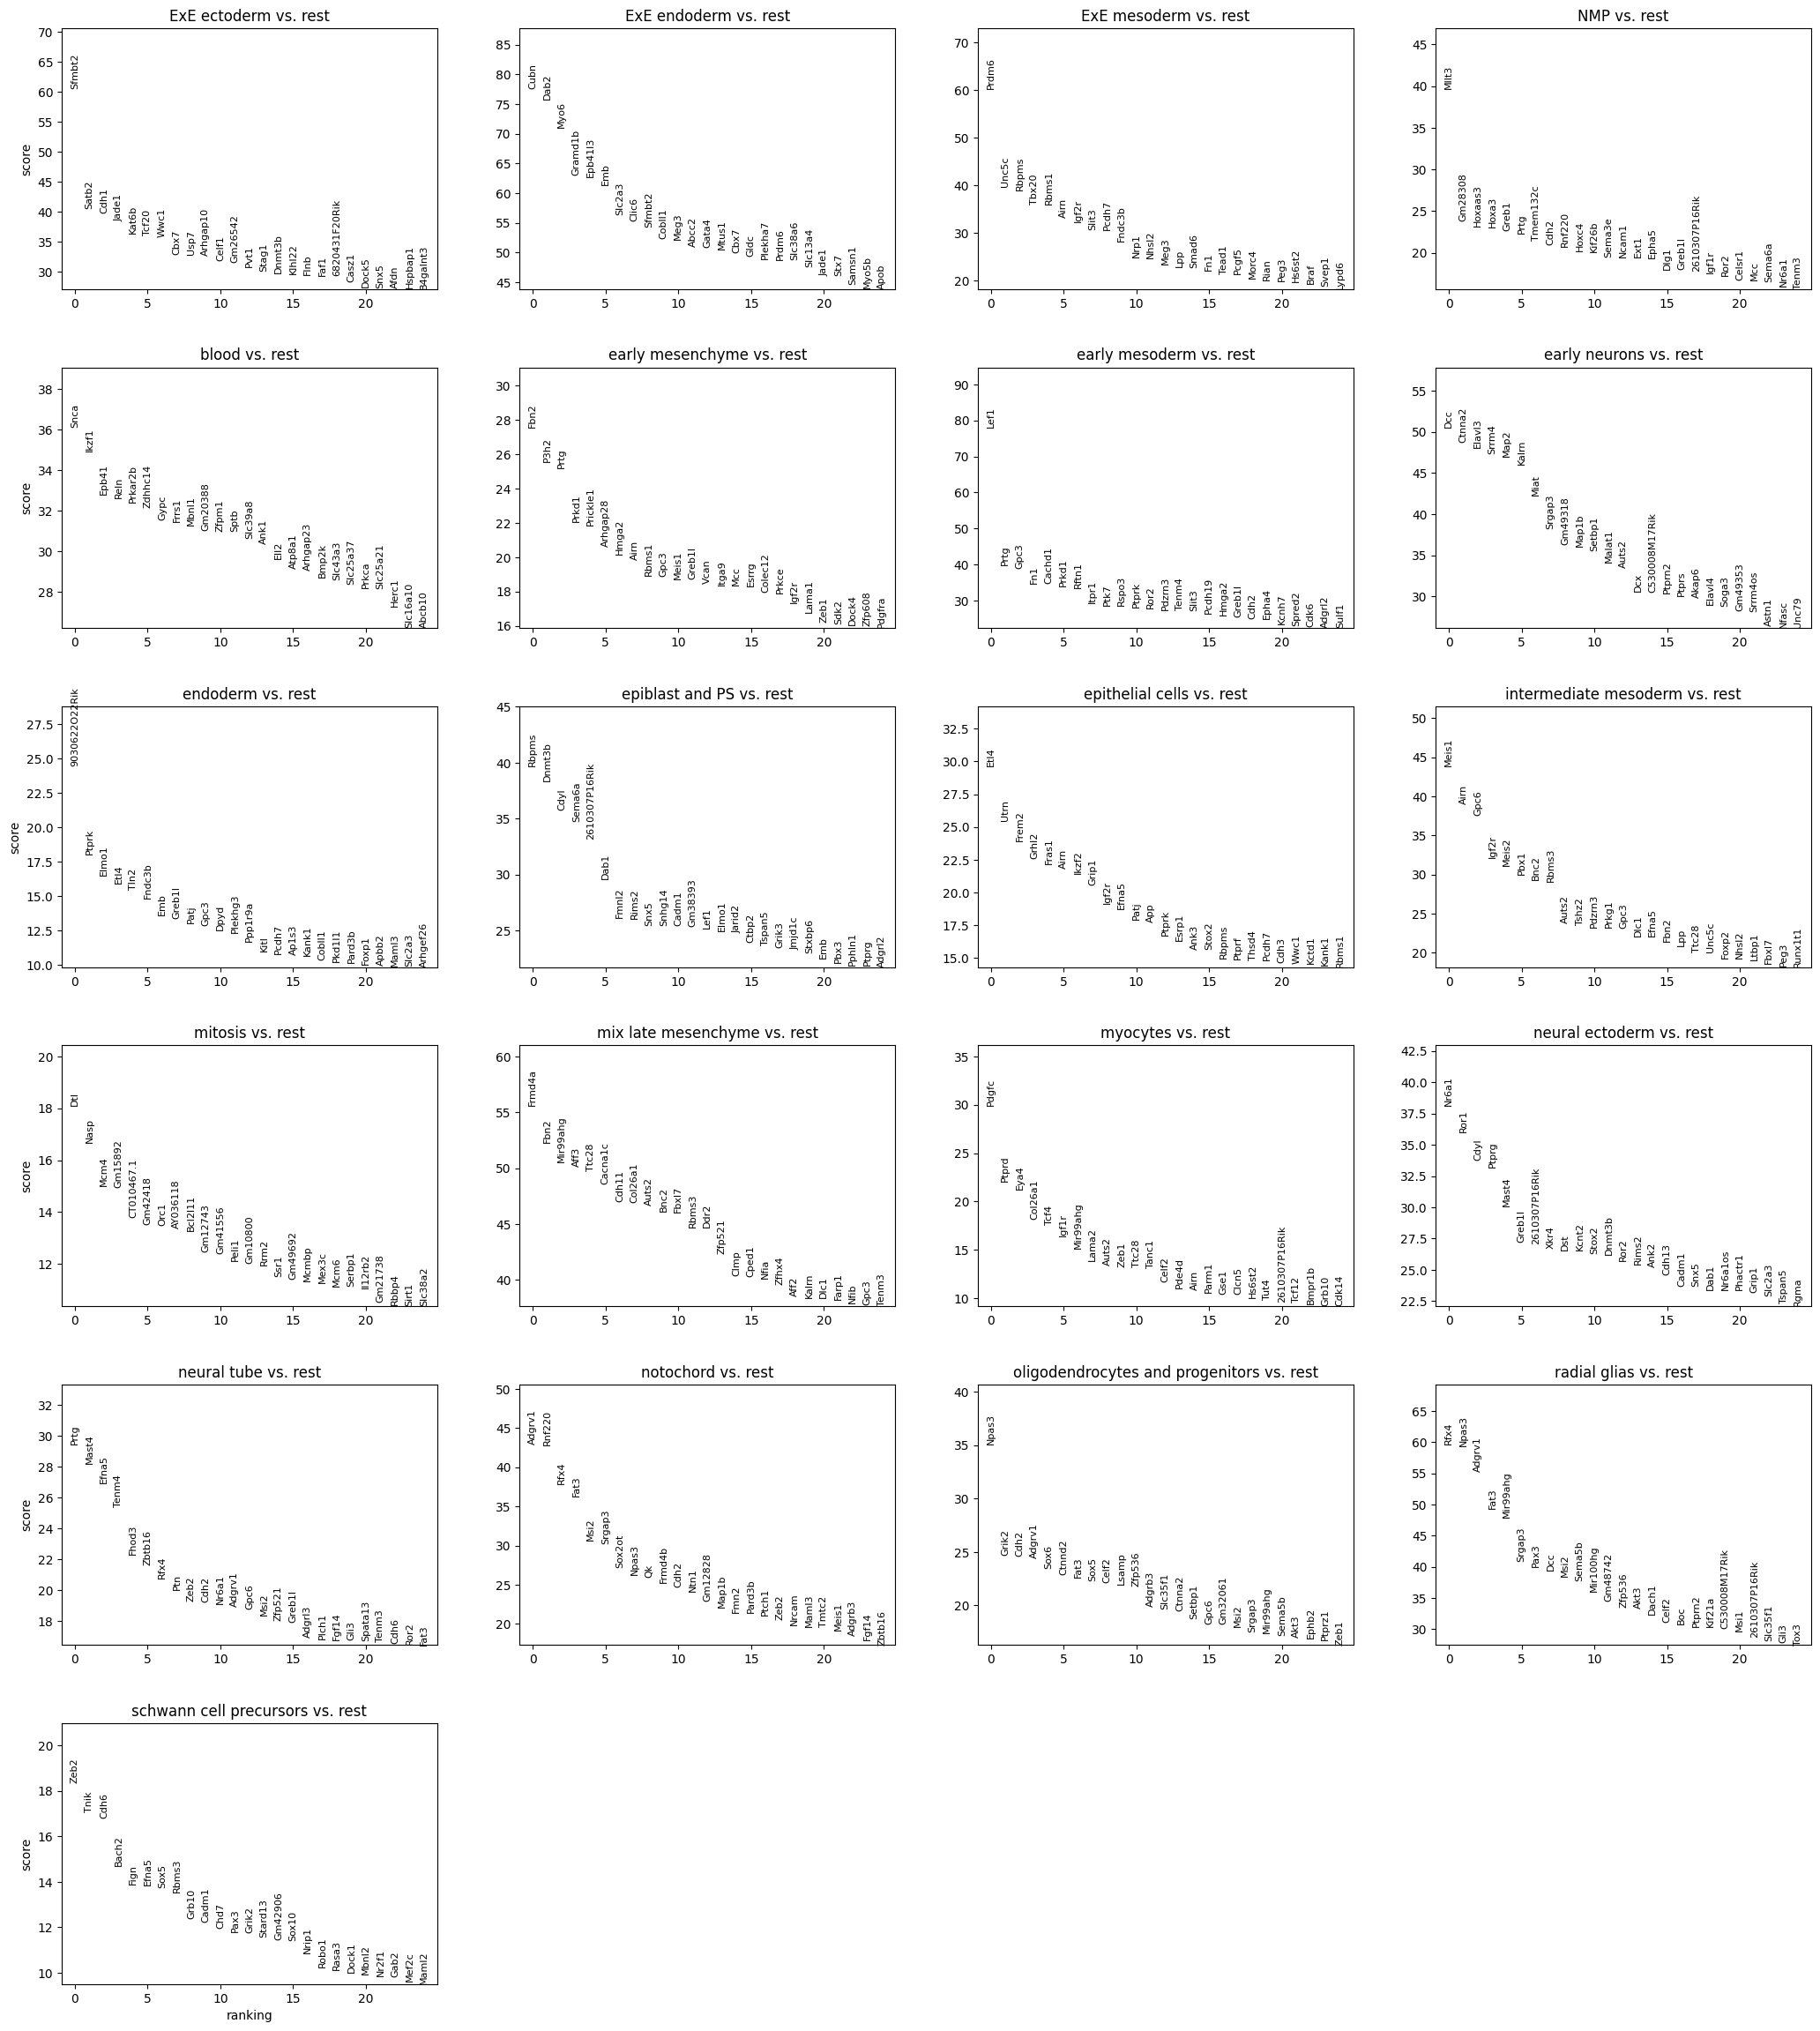

In [2]:
rna = anndata.read_h5ad("/lmh_data/data/sclab/GSE223917/scRNA.h5ad")
rna.obs.cell_type = rna.obs.cell_type.cat.rename_categories({'Oligo': 'ODC'})
rna.layers["counts"] = rna.X.copy()

scglue.data.get_gene_annotation(
    rna, gtf="/lmh_data/data/sclab/GSE223917/gencode.vM23.annotation.gtf",
    gtf_by="gene_name"
)
rna = rna[:, rna.var.dropna(axis=0, how='all').index]

sc.pp.highly_variable_genes(rna, n_top_genes=2000, flavor="seurat_v3")
sc.pp.normalize_total(rna)
sc.pp.log1p(rna)
sc.pp.scale(rna)
sc.tl.pca(rna, n_comps=100, svd_solver="auto")

sc.tl.rank_genes_groups(rna, 'cell_type', method='t-test')
sc.pl.rank_genes_groups(rna, n_genes=25, sharey=False)

In [3]:
rank_genes_groups = pd.DataFrame(rna.uns['rank_genes_groups']['names'])[:100]
rank_genes_groups[:20]

,ExE ectoderm,ExE endoderm,ExE mesoderm,NMP,blood,early mesenchyme,early mesoderm,early neurons,endoderm,epiblast and PS,...,intermediate mesoderm,mitosis,mix late mesenchyme,myocytes,neural ectoderm,neural tube,notochord,oligodendrocytes and progenitors,radial glias,schwann cell precursors
0,Sfmbt2,Cubn,Prdm6,Mllt3,Snca,Fbn2,Lef1,Dcc,9030622O22Rik,Rbpms,...,Meis1,Dtl,Frmd4a,Pdgfc,Nr6a1,Prtg,Adgrv1,Npas3,Rfx4,Zeb2
1,Satb2,Dab2,Unc5c,Gm28308,Ikzf1,P3h2,Prtg,Ctnna2,Ptprk,Dnmt3b,...,Airn,Nasp,Fbn2,Ptprd,Ror1,Mast4,Rnf220,Grik2,Npas3,Tnik
2,Cdh1,Myo6,Rbpms,Hoxaas3,Epb41,Prtg,Gpc3,Elavl3,Elmo1,Cdyl,...,Gpc6,Mcm4,Mir99ahg,Eya4,Cdyl,Efna5,Rfx4,Cdh2,Adgrv1,Cdh6
3,Jade1,Gramd1b,Tbx20,Hoxa3,Reln,Prkd1,Fn1,Srrm4,Etl4,Sema6a,...,Igf2r,Gm15892,Aff3,Col26a1,Ptprg,Tenm4,Fat3,Adgrv1,Fat3,Bach2
4,Kat6b,Epb41l3,Rbms1,Greb1,Prkar2b,Prickle1,Cachd1,Map2,Tln2,2610307P16Rik,...,Meis2,CT010467.1,Ttc28,Tcf4,Mast4,Fhod3,Msi2,Sox6,Mir99ahg,Fign
5,Tcf20,Emb,Airn,Prtg,Zdhhc14,Arhgap28,Prkd1,Kalrn,Fndc3b,Dab1,...,Pbx1,Gm42418,Cacna1c,Igf1r,Greb1l,Zbtb16,Srgap3,Ctnnd2,Srgap3,Efna5
6,Wwc1,Slc2a3,Igf2r,Tmem132c,Gypc,Hmga2,Rftn1,Miat,Emb,Fmnl2,...,Bnc2,Orc1,Cdh11,Mir99ahg,2610307P16Rik,Rfx4,Sox2ot,Fat3,Pax3,Sox5
7,Cbx7,Clic6,Slit3,Cdh2,Frrs1,Airn,Itpr1,Srgap3,Greb1l,Rims2,...,Rbms3,AY036118,Col26a1,Lama2,Xkr4,Ptn,Npas3,Sox5,Dcc,Rbms3
8,Usp7,Sfmbt2,Pcdh7,Rnf220,Mbnl1,Rbms1,Ptk7,Gm49318,Patj,Snx5,...,Auts2,Bcl2l11,Auts2,Auts2,Dst,Zeb2,Qk,Celf2,Msi2,Grb10
9,Arhgap10,Cobll1,Fndc3b,Hoxc4,Gm20388,Gpc3,Rspo3,Map1b,Gpc3,Snhg14,...,Tshz2,Gm12743,Bnc2,Zeb1,Kcnt2,Cdh2,Frmd4b,Lsamp,Sema5b,Cadm1


In [4]:
marker_genes = pd.DataFrame()
for index, row in rank_genes_groups.iterrows():
    for cell_type in row.keys():
        marker_genes = pd.concat(
            [
                marker_genes, 
                pd.DataFrame(data=[[row[cell_type], '{}_{}'.format(cell_type, index)]], columns=['gene_name', 'rank'])
            ],
            ignore_index=True
        )
marker_genes = marker_genes.groupby('gene_name')['rank'].apply(list).reset_index(name='rank')
marker_genes = marker_genes.set_index('gene_name')
marker_genes

,rank
gene_name,
0610040J01Rik,[ExE endoderm_55]
1700006J14Rik,[early mesenchyme_42]
2210016F16Rik,[mitosis_92]
2610035D17Rik,[oligodendrocytes and progenitors_99]
2610307P16Rik,"[epiblast and PS_4, neural ectoderm_6, NMP_17,..."
...,...
Zswim5,"[early neurons_53, notochord_69]"
Zswim6,"[notochord_31, schwann cell precursors_31, ear..."
a,[mitosis_41]


In [5]:
marker_genes = pd.concat([marker_genes, rna.var[['chrom', 'chromStart', 'chromEnd', 'strand']]], axis=1, join='inner')
marker_genes

,rank,chrom,chromStart,chromEnd,strand
0610040J01Rik,[ExE endoderm_55],chr5,63812362,63899625,+
1700006J14Rik,[early mesenchyme_42],chr10,120364156,120384336,+
2210016F16Rik,[mitosis_92],chr13,58379816,58385225,-
2610035D17Rik,[oligodendrocytes and progenitors_99],chr11,113043894,113201838,-
2610307P16Rik,"[epiblast and PS_4, neural ectoderm_6, NMP_17,...",chr13,28460033,28885620,-
...,...,...,...,...,...
Zswim5,"[early neurons_53, notochord_69]",chr4,116877375,116989264,+
Zswim6,"[notochord_31, schwann cell precursors_31, ear...",chr13,107724616,107890064,-
a,[mitosis_41],chr2,154791401,155051012,+
mt-Rnr1,"[neural tube_41, mitosis_59]",chrM,69,1024,+


In [6]:
marker_genes.to_csv("/lmh_data/data/sclab/GSE223917/rna_marker_gene.csv", sep='\t')